![Logo 1](https://git.wmi.amu.edu.pl/AITech/Szablon/raw/branch/master/Logotyp_AITech1.jpg)
<div class="alert alert-block alert-info">
<h1> Modelowanie języka</h1>
<h2> 10. <i>Neuronowy n-gramowy model języka</i>  [wykład]</h2> 
<h3> Filip Graliński (2022)</h3>
</div>

![Logo 2](https://git.wmi.amu.edu.pl/AITech/Szablon/raw/branch/master/Logotyp_AITech2.jpg)



## Neuronowy n-gramowy model języka



Omówiony w poprzedniej części neuronowy bigramowy model języka
warunkuje kolejny wyraz jedynie względem bezpośrednio poprzedzającego
— jak w każdym bigramowym modelu przyjmujemy założenie, że $w_i$
zależy tylko od $w_{i-1}$. Rzecz jasna jest to bardzo duże
ograniczenie, w rzeczywistości bardzo często prawdopodobieństwo
kolejnego wyrazu zależy od wyrazu dwie, trzy, cztery itd. pozycje
wstecz czy w ogólności od wszystkich wyrazów poprzedzających (bez
względu na ich pozycje).

**Pytanie**: Wskaż zależności o zasięgu większym niż 1 wyraz w zdaniu
/Zatopieni w kłębach dymu cygar i pochyleni nad butelkami z ciemnego
szkła obywatele tej dzielnicy, jedni zakładali się o wygranę lub
przegranę Anglii, drudzy o bankructwo Wokulskiego; jedni nazywali
geniuszem Bismarcka, drudzy — awanturnikiem Wokulskiego; jedni
krytykowali postępowanie prezydenta MacMahona, inni twierdzili, że
Wokulski jest zdecydowanym wariatem, jeżeli nie czymś gorszym…/



### Trigramowy neuronowy model języka



Spróbujmy najpierw rozszerzyć nasz model na trigramy, to znaczy
będziemy przewidywać słowo $w_i$ na podstawie słów $w_{i-2}$ i
$w_{i-1}$.

Najprostsze rozwiązanie polegałoby na zanurzeniu pary $(w_{i-2},
w_{i-1})$ w całości i postępowaniu jak w przypadku modelu bigramowego.
Byłoby to jednak zupełnie niepraktyczne, jako że:

-   liczba zanurzeń do wyuczenia byłaby olbrzymia ($|V|^2$ — byłoby to
    ewentualnie akceptowalne dla modeli operujących na krótszych
    jednostkach niż słowa, np. na znakach),
-   w szczególności zanurzenia dla par $(v, u)$, $(u, v)$, $(u, u)$ i
    $(v, v)$ nie miałyby ze sobą nic wspólnego.



#### Konketanacja zanurzeń



Właściwsze rozwiązanie polega na zanurzeniu dalej pojedynczych słów i
następnie ich **konkatenowaniu**.

Przypomnijmy, że konkatenacja wektorów $\vec{x_1}$ i $\vec{x_2}$ to wektor o rozmiarze
$|\vec{x_1}| + |\vec{x_2}|$ powstały ze „sklejania” wektorów $\vec{x_1}$ i $\vec{x_2}$.
Konkatenację wektorów $\vec{x_1}$ i $\vec{x_2}$ będziemy oznaczać za pomocą $[\vec{x_1}, \vec{x_2}]$.

Przykład: jeśli $\vec{x_1} = [-1, 2, 0]$ i $\vec{x_2} = [3, -3]$,
wówczas $[\vec{x_1}, \vec{x_2}] = [-1, 2, 0, 3, -3]$

Oznacza to, że nasza macierz „kontekstowa” $C$ powinna mieć w modelu trigramowym rozmiar nie
$|V| \times m$, lecz $|V| \times (m+m)$ = $|V| \times 2m$ i wyjście będzie zdefiniowane za pomocą wzoru:

$$\vec{y} = \operatorname{softmax}(C[E(w_{i-2}),E(w_{i-1})]),$$

co można przedstawić za pomocą następującego schematu:

![img](./10_Neuronowy_ngramowy_model/trigram1.drawio.png "Diagram prostego bigramowego neuronowego modelu języka")



##### Rozbicie macierzy $C$



Zamiast mnożyć macierz $C$ przez konkatenację dwóch wektorów, można
rozbić macierz $C$ na dwie, powiedzmy $C_{-2}$ i $C_{-1}$, przemnażać
je osobno przez odpowiadające im wektory i następnie **dodać** macierze,
tak aby:

$$C[E(w_{i-2}),E(w_{i-1})] = C_{-2}E(w_{i-2}) + C_{-1}E(w_{i-1}).$$

Macierze $C_{-2}$ i $C_{-1}$ będą miały rozmiar $|V| \times m$.

Przy tym podejściu możemy powiedzieć, że ostatni i przedostatni wyraz
mają swoje osobne macierze o potencjalnie różnych wagach — co ma sens,
jako że na inne aspekty zwracamy uwagę przewidując kolejne słowo na
podstawie wyrazu bezpośrednio poprzedzającego, a na inne — na
podstawie słowa występującego dwie pozycje wcześniej.



### Uogólnienie na $n$-gramowy model języka dla dowolnego $n$



Łatwo uogólnić opisany wyżej trigramowy model języka dla dowolnego $n$.
Uogólniony model można przedstawić za pomocą wzoru:

$$\vec{y} = \operatorname{softmax}(C[E(w_{i-n+1}),\dots,E(w_{i-1})]),$$

gdzie macierz $C$ ma rozmiar $|V| \times nm$ lub za pomocą wzoru:

$$\vec{y} = \operatorname{softmax}(C_{-(n-1)}E(w_{i-n+1}) + \dots + C_{-1}E(w_{i-1}),$$

gdzie macierze $C_{-(n-1)}$, &hellip;, $C_{-1}$ mają rozmiary $|V| \times m$.

Por. diagram:

![img](./10_Neuronowy_ngramowy_model/ngram.drawio.png "Diagram prostego n-gramowego neuronowego modelu języka")



### Dodanie kolejnej warstwy



W wypadku trigramowego czy — ogólniej — n-gramowego modelu języka dla
$n \geq 3$ warto dodać kolejną (**ukrytą**) warstwę, na którą będziemy rzutować
skonkatenowane embeddingi, zanim zrzutujemy je do długiego wektora
prawdopodobieństw.

Zakładamy, że warstwa ukryta zawiera $h$ neuronów. Wartość $h$ powinna być mniejsza
niż $nm$ (a może nawet od $m$).

**Pytanie**: Dlaczego wartość $h > nm$ nie jest racjonalnym wyborem?

**Pytanie**: Dlaczego dodanie kolejnej warstwy nie ma sensu dla modelu bigramowego?



#### Funkcja aktywacji



Aby warstwa ukryta wnosiła coś nowego, na wyjściu z tej funkcji musimy (dlaczego?)
zastosować nieliniową **funkcji aktywacji**. Zazwyczaj jako funkcji
aktywacji w sieciach neuronowych używa się funkcji ReLU albo funkcji
sigmoidalnej. W prostych neuronowych modelach języka sprawdza się też
**tangens hiperboliczny** (tgh, w literaturze anglojęzycznej tanh):

$$\operatorname{tgh}(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}.$$



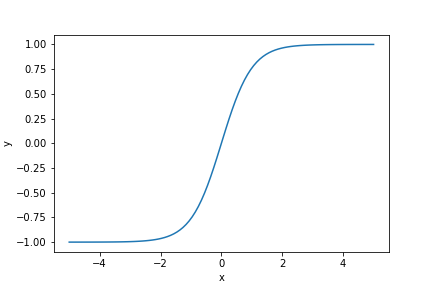

In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

x = torch.linspace(-5,5,100)
plt.xlabel("x")
plt.ylabel("y")
a = torch.Tensor(x.size()[0]).fill_(2.)
m = torch.stack([x, a])
plt.plot(x, nn.functional.tanh(m)[0])
fname = '10_Neuronowy_ngramowy_model/tanh.png'
plt.savefig(fname)
fname

##### Tangens hiperboliczny zastosowany dla wektora



Tangens hiperboliczny wektora będzie po prostu wektorem tangensów
hiperbolicznych poszczególnych wartości.



In [1]:
import torch
import torch.nn as nn

v = torch.Tensor([-100, -2.0, 0.0, 0.5, 1000.0])
nn.functional.tanh(v)

[[[tensor](tensor)([-1.0000, -0.9640,  0.0000,  0.4621,  1.0000])]]



#### Wzór i schemat dwuwarstwowego n-gramowego neuronowego modelu języka



Dwuwarstwowy model języka będzie określony następującym wzorem:

$$\vec{y} = \operatorname{softmax}(C\operatorname{tgh}(W[E(w_{i-n+1}),\dots,E(w_{i-1})])),$$

gdzie:

-   $W$ jest wyuczalną macierzą wag o rozmiarze $h \times nm$,
-   $C$ będzie macierzą o rozmiarze $|V| \times h$.

Zmodyfikowaną sieć można przedstawić za pomocą następującego schematu:

![img](./10_Neuronowy_ngramowy_model/ngram-tgh.drawio.png "Dwuwarstwowy n-gramowy neuronowy model języka")



#### Liczba wag w modelu dwuwarstwowym



Na wagi w modelu dwuwarstwowym składają się:

-   zanurzenia: $m|V|$,
-   wagi warstwy ukrytej: $hnm$,
-   wagi warstwy wyjściowej: $|V|h$,

a zatem łącznie:

$$m|V| + hnm + |V|h$$

Jeśli $h \approx m$ (co jest realistyczną opcją), wówczas otrzymamy oszacowanie:

$$O(m|V| + nm^2).$$

Zauważmy, że względem $n$ oznacza to bardzo korzystną złożoność
$O(n)$! Oznacza to, że nasz model może działać dla dużo większych
wartości $n$ niż tradycyjny, statystyczny n-gramowy model języka (dla którego
wartości $n > 5$ zazwyczaj nie mają sensu).

